In [1]:
import csv
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib import dates

In [2]:
sns.set_style("whitegrid")

In [3]:
data = pd.read_csv("Final Project Data.csv")

In [4]:
# drop columns that are not needed 
data = data.drop(columns=['Email Address'])

In [5]:
data[['Date', 'Time']] = data['Timestamp'].str.split(' ', expand=True)

In [6]:
# reorder data by animal
data = data.sort_values(by='Animal', ascending=True)

In [7]:
data.head()

,Timestamp,Animal,# of people interacting,Animal Position,Guest Interaction,Guest Demographics,Interaction Length,Assumed Emotion,Additional notes,Date,Time
45,5/31/2025 16:03:07,bear 1,2,"Eating (reptile, monkey, bear), Standing on fo...","Observing animal behavior, Taking pictures of ...",Friends,02:53,Neutral,Zoo keeper feeding. Fans starting.,5/31/2025,16:03:07
50,5/31/2025 16:09:54,bear 1,2,"Standing on four legs (reptile, monkey, bear)",Observing animal behavior,Couple,00:21,Neutral,NaN,5/31/2025,16:09:54
49,5/31/2025 16:08:25,bear 1,4,"Standing on four legs (reptile, monkey, bear)",Observing animal behavior,Friends,00:15,Neutral,NaN,5/31/2025,16:08:25
48,5/31/2025 16:07:45,bear 1,4,"Eating (reptile, monkey, bear), Standing on fo...","Observing animal behavior, Taking pictures of ...",Friends,00:31,Excitment,NaN,5/31/2025,16:07:45
47,5/31/2025 16:07:06,bear 1,2,"Standing on four legs (reptile, monkey, bear)","Observing animal behavior, Pointing at animal",Couple,00:08,Neutral,NaN,5/31/2025,16:07:06


In [8]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [9]:
data.describe()

,Timestamp,Animal,# of people interacting,Animal Position,Guest Interaction,Guest Demographics,Interaction Length,Assumed Emotion,Additional notes,Date,Time
count,154,154,154,153,154,154,154,154,17,154,154
unique,154,9,5,26,23,5,68,3,17,3,154
top,5/31/2025 16:03:07,reptile 2,2,"Sleeping (reptile, monkey, bear)","Observing animal behavior, Pointing at animal",Family w/ kids,00:15,Neutral,Zoo keeper feeding. Fans starting.,5/31/2025,16:03:07
freq,1,30,79,42,41,58,7,124,1,67,1


/var/folders/15/tbb712t548vcwk6rxth7tk0h0000gn/T/ipykernel_67690/1653743573.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data, x="Animal",


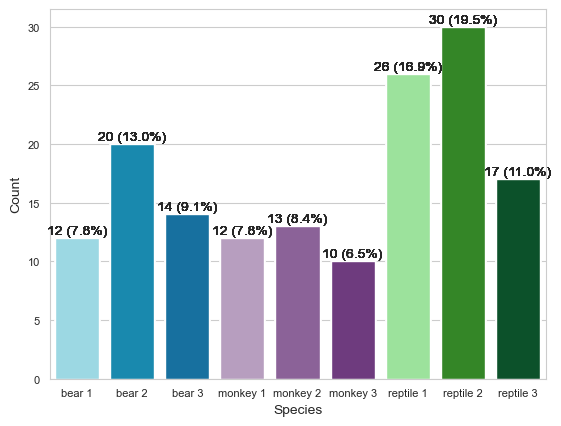

In [10]:
custom_palette = {"bear 1": "#90E0EF", "bear 2": "#0096C7", "bear 3": "#0077B6", 
                  "reptile 1": "#90EE90", "reptile 2": "#299617", "reptile 3": "#005C29", 
                  "monkey 1": "#BA98C4", "monkey 2": "#9059A1", "monkey 3": "#743089"}
ax = sns.countplot(data, x="Animal", 
                   order=data['Animal'].sort_values(),
                   palette=custom_palette)

plt.xlabel("Species")
plt.ylabel("Count")

plt.tick_params(labelsize=8)

# Add percentages and counts to the bars
total = len(data)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.annotate(f'{math.floor(height)} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2, height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [11]:
# Convert time strings to Timedelta (in seconds) (useed AI for this code)
data['time_in_seconds'] = pd.to_timedelta('00:' + data['Interaction Length'])  # Prefix with '00:' for hours
data['time_in_seconds'] = data['time_in_seconds'].dt.total_seconds() # Get total seconds

# Normalize to a single day for simpler plotting
data['normalized_time'] = pd.to_datetime('2000-01-01') + pd.to_timedelta(data['time_in_seconds'], unit='s')

data.head()


,Timestamp,Animal,# of people interacting,Animal Position,Guest Interaction,Guest Demographics,Interaction Length,Assumed Emotion,Additional notes,Date,Time,time_in_seconds,normalized_time
45,5/31/2025 16:03:07,bear 1,2,"Eating (reptile, monkey, bear), Standing on fo...","Observing animal behavior, Taking pictures of ...",Friends,02:53,Neutral,Zoo keeper feeding. Fans starting.,5/31/2025,16:03:07,173.0,2000-01-01 00:02:53
50,5/31/2025 16:09:54,bear 1,2,"Standing on four legs (reptile, monkey, bear)",Observing animal behavior,Couple,00:21,Neutral,NaN,5/31/2025,16:09:54,21.0,2000-01-01 00:00:21
49,5/31/2025 16:08:25,bear 1,4,"Standing on four legs (reptile, monkey, bear)",Observing animal behavior,Friends,00:15,Neutral,NaN,5/31/2025,16:08:25,15.0,2000-01-01 00:00:15
48,5/31/2025 16:07:45,bear 1,4,"Eating (reptile, monkey, bear), Standing on fo...","Observing animal behavior, Taking pictures of ...",Friends,00:31,Excitment,NaN,5/31/2025,16:07:45,31.0,2000-01-01 00:00:31
47,5/31/2025 16:07:06,bear 1,2,"Standing on four legs (reptile, monkey, bear)","Observing animal behavior, Pointing at animal",Couple,00:08,Neutral,NaN,5/31/2025,16:07:06,8.0,2000-01-01 00:00:08


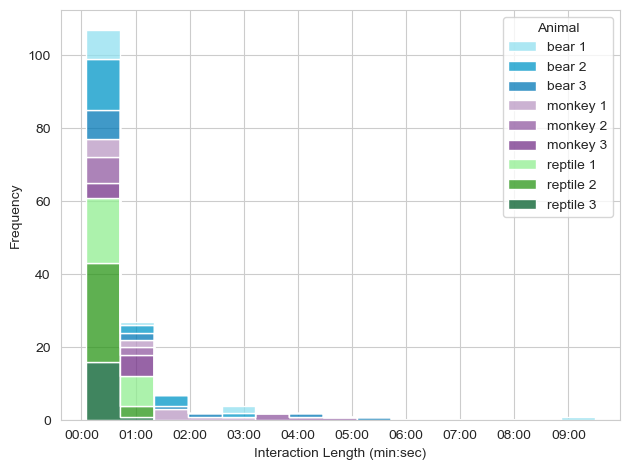

In [12]:
# graph of interaction length
ax = sns.histplot(data, x="normalized_time", hue="Animal", multiple="stack", bins=15, element="step", palette=custom_palette)
plt.xlabel("Interaction Length (min:sec)")
plt.ylabel("Frequency")

# Set x-axis format to mm:ss
ax.xaxis.set_major_formatter(dates.DateFormatter('%M:%S'))

plt.tight_layout()

plt.show()

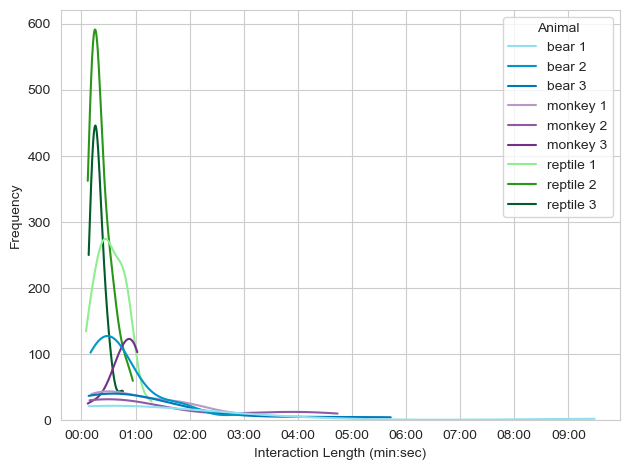

In [13]:
# graph of interaction length
ax = sns.kdeplot(data, x="normalized_time", hue="Animal", cut=0, palette=custom_palette)
plt.xlabel("Interaction Length (min:sec)")
plt.ylabel("Frequency")

# Set x-axis format to mm:ss
ax.xaxis.set_major_formatter(dates.DateFormatter('%M:%S'))

plt.tight_layout()

plt.show()

/var/folders/15/tbb712t548vcwk6rxth7tk0h0000gn/T/ipykernel_67690/3439535093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data, x="# of people interacting", palette="Blues", order=data['# of people interacting'].sort_values().unique())


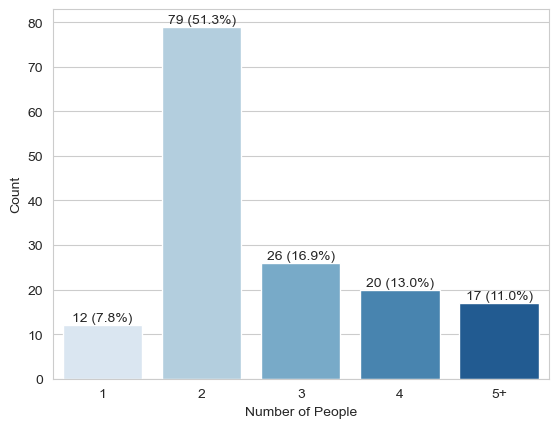

In [14]:
# coutplot of # of people interacting

ax = sns.countplot(data, x="# of people interacting", palette="Blues", order=data['# of people interacting'].sort_values().unique())
plt.xlabel("Number of People")
plt.ylabel("Count")

# Add percentages and counts to the bars

total = len(data)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.annotate(f'{math.floor(height)} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2, height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

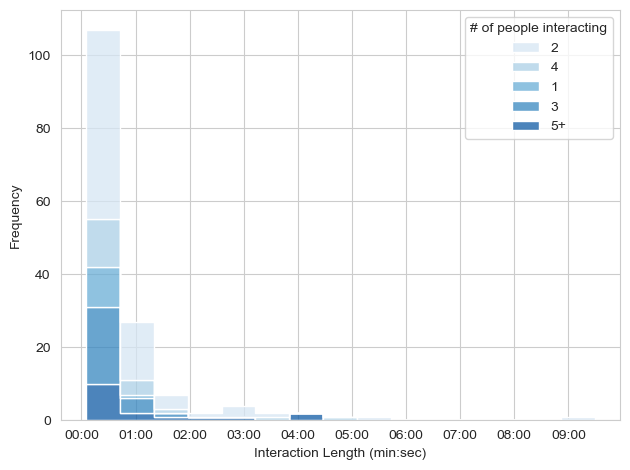

In [15]:
# graph of interaction length by number of people interacting
ax = sns.histplot(data, x="normalized_time", hue="# of people interacting", multiple="stack", bins=15, element="step", palette="Blues")
plt.xlabel("Interaction Length (min:sec)")
plt.ylabel("Frequency")

# Set x-axis format to mm:ss
ax.xaxis.set_major_formatter(dates.DateFormatter('%M:%S'))
plt.tight_layout()
plt.show()

/var/folders/15/tbb712t548vcwk6rxth7tk0h0000gn/T/ipykernel_67690/4194289771.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data_counts, x='Weekday vs Weekend', y='percentage', hue='# of people interacting', palette="Blues", ci=None)


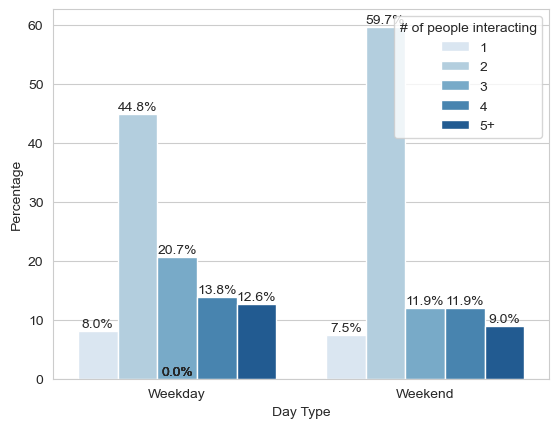

In [16]:
# graph of number of people interacting by weekend vs weekday

data['Weekday vs Weekend'] = pd.to_datetime(data['Date']).dt.day_name()
data['Weekday vs Weekend'] = np.where(data['Weekday vs Weekend'].isin(['Saturday', 'Sunday']), 'Weekend', 'Weekday')

# normalize the data for weekend vs weekday to only be percentages
data_counts = data.groupby(['Weekday vs Weekend', '# of people interacting']).size().reset_index(name='count')
data_counts['percentage'] = data_counts['count'] / data_counts.groupby('Weekday vs Weekend')['count'].transform('sum') * 100

ax = sns.barplot(data=data_counts, x='Weekday vs Weekend', y='percentage', hue='# of people interacting', palette="Blues", ci=None)
plt.xlabel("Day Type")
plt.ylabel("Percentage")

# Add percentages to the bars
for p in ax.patches:
    height = p.get_height()
    percentage = height
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

/var/folders/15/tbb712t548vcwk6rxth7tk0h0000gn/T/ipykernel_67690/2821420840.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data_interact, palette="Blues", order=data_interact.value_counts().index)


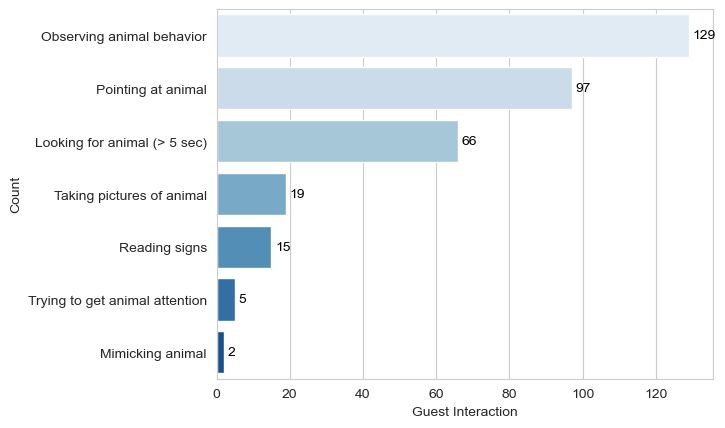

In [17]:
# graph of guest interaction

# split data by commas
data_interact = data['Guest Interaction'].str.split(',').apply(lambda x: [i.strip() for i in x])
data_interact = data_interact.explode('Guest Interaction')

# Remove anything only mentioned once
data_interact = data_interact[data_interact.isin(data_interact.value_counts()[data_interact.value_counts() > 1].index)]

ax = sns.countplot(data_interact, palette="Blues", order=data_interact.value_counts().index)
    
plt.xlabel("Guest Interaction")
plt.ylabel("Count")

# Add percentages and counts to the bars
for i, v in enumerate(data_interact.value_counts()):
    ax.text(v + 1, i, f'{v}', color='black', va='center')


plt.show()

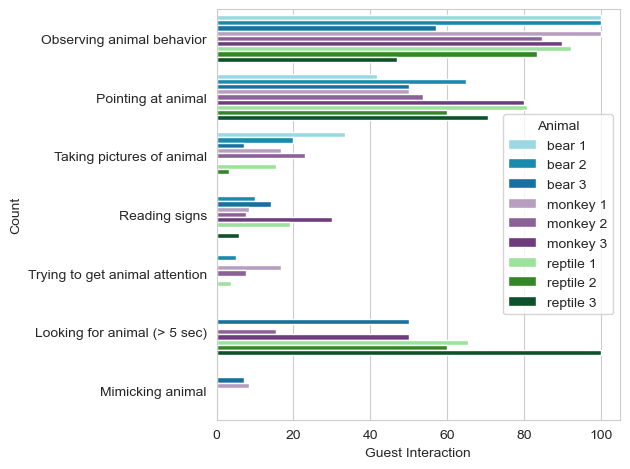

In [18]:
# graph of guest interaction by animal

data_interact_animal = data[['Animal', 'Guest Interaction']].dropna()

# split data by commas
data_interact_animal['Guest Interaction'] = data_interact_animal['Guest Interaction'].str.split(',').apply(lambda x: [i.strip() for i in x])
data_interact_animal = data_interact_animal.explode('Guest Interaction')

# Remove anything only mentioned once
data_interact_animal_counts = data_interact_animal['Guest Interaction'].value_counts()
data_interact_animal = data_interact_animal[data_interact_animal['Guest Interaction'].isin(data_interact_animal_counts[data_interact_animal_counts > 1].index)]

# normalize the data to be percentages of the animal mentioned
data_interact_animal_counts = data_interact_animal.groupby(['Animal', 'Guest Interaction']).size().reset_index(name='count')
data_animal = data.groupby(['Animal']).size().reset_index(name='total_count')  # Get total counts for each animal
data_interact_animal_counts = data_interact_animal_counts.merge(data_animal, on='Animal')  # Merge to get total counts
data_interact_animal_counts['percentage'] = data_interact_animal_counts['count'] / data_interact_animal_counts['total_count'] * 100  # Calculate percentage

ax = sns.barplot(data=data_interact_animal_counts, y='Guest Interaction', x='percentage', hue='Animal', palette=custom_palette)
plt.xlabel("Guest Interaction")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [19]:
data_interact_animal_counts

,Animal,Guest Interaction,count,total_count,percentage
0,bear 1,Observing animal behavior,12,12,100.000000
1,bear 1,Pointing at animal,5,12,41.666667
2,bear 1,Taking pictures of animal,4,12,33.333333
3,bear 2,Observing animal behavior,20,20,100.000000
4,bear 2,Pointing at animal,13,20,65.000000
5,bear 2,Reading signs,2,20,10.000000
6,bear 2,Taking pictures of animal,4,20,20.000000
7,bear 2,Trying to get animal attention,1,20,5.000000
8,bear 3,Looking for animal (> 5 sec),7,14,50.000000
9,bear 3,Mimicking animal,1,14,7.142857


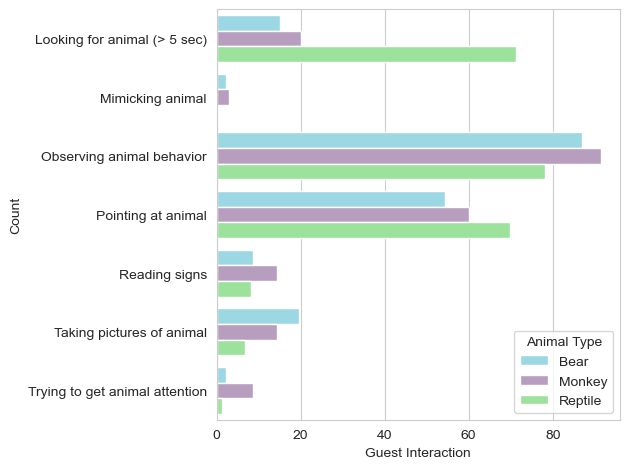

In [22]:
# group "data_interact_animal_counts" by animal type (eg. bear, reptile, monkey)
def group_animal_type(animal):
    if 'bear' in animal.lower():
        return 'Bear'
    elif 'reptile' in animal.lower():
        return 'Reptile'
    elif 'monkey' in animal.lower():
        return 'Monkey'
    else:
        return 'Other'
    
data_animal_types = data
data_interact_animal_counts['Animal Type'] = data_interact_animal_counts['Animal'].apply(group_animal_type)
data_animal_types['Animal Type'] = data_animal_types['Animal'].apply(group_animal_type)

# normalize the data to be percentages of the animal type mentioned
data_interact_animal_type_counts = data_interact_animal_counts.groupby(['Animal Type', 'Guest Interaction']).sum().reset_index()
data_animal = data_animal_types.groupby(['Animal Type']).size().reset_index(name='total_count')  # Get total counts for each animal
data_interact_animal_type_counts = data_interact_animal_type_counts.merge(data_animal, on='Animal Type', how='left')  # Merge to get total counts
data_interact_animal_type_counts['percentage'] = data_interact_animal_type_counts['count'] / data_interact_animal_type_counts['total_count_y'] * 100  # Calculate percentage

ax = sns.barplot(data=data_interact_animal_type_counts, y='Guest Interaction', x='percentage', hue='Animal Type', palette=["#90E0EF", "#BA98C4", "#90EE90"])
plt.xlabel("Guest Interaction")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [23]:
data_interact_animal_type_counts

,Animal Type,Guest Interaction,Animal,count,total_count_x,percentage,total_count_y
0,Bear,Looking for animal (> 5 sec),bear 3,7,14,15.217391,46
1,Bear,Mimicking animal,bear 3,1,14,2.173913,46
2,Bear,Observing animal behavior,bear 1bear 2bear 3,40,46,86.956522,46
3,Bear,Pointing at animal,bear 1bear 2bear 3,25,46,54.347826,46
4,Bear,Reading signs,bear 2bear 3,4,34,8.695652,46
5,Bear,Taking pictures of animal,bear 1bear 2bear 3,9,46,19.565217,46
6,Bear,Trying to get animal attention,bear 2,1,20,2.173913,46
7,Monkey,Looking for animal (> 5 sec),monkey 2monkey 3,7,23,20.000000,35
8,Monkey,Mimicking animal,monkey 1,1,12,2.857143,35
9,Monkey,Observing animal behavior,monkey 1monkey 2monkey 3,32,35,91.428571,35
